# Narrative

## GOALS
- Provide a code narrative in this project including:
    - a map of the South King County region
    - updated tables in comparison with the OY in the Road Map Project Region report
    - final vizualizations for the data


## Detailed Steps

Import necessary packages

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sqlalchemy import create_engine
pd.options.display.float_format = '{:,.1f}'.format

## List of PUMAs

In [13]:
engine = create_engine("postgresql:///opportunity_youth")

In [14]:
#force rightmost column to display wider
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

puma_names_list = pd.read_sql(sql="SELECT * FROM puma_names_finder0;", con=engine)
puma_names_df = pd.DataFrame(puma_names_list).style.hide_index()
puma_names_df

puma,puma_name
11610,"King County (Central)--Renton City, Fairwood, Bryn Mawr & Skyway"
11611,"King County (West Central)--Burien, SeaTac, Tukwila Cities & White Center"
11612,"King County (Far Southwest)--Federal Way, Des Moines Cities & Vashon Island"
11613,King County (Southwest Central)--Kent City
11614,King County (Southwest)--Auburn City & Lakeland
11615,"King County (Southeast)--Maple Valley, Covington & Enumclaw Cities"


## Map

In [55]:
wa_puma = gpd.read_file('/Users/karenwarmbein/ds/lectures/opportunity_youth/data/raw/tl_2017_53_puma10.shp')
df = pd.DataFrame(wa_puma)

In [17]:
def filtering_func(x):
    #this will be used to filter the puma values to get a simple yes or no value for the corresponding districts.
    filter_list1 = list(range(11610, 11616))
    filter_list2 = list(range(11601, 11610))
    filter_list2.append(11616)
    if any(x == filtered_num for filtered_num in filter_list1):
        return 'red'
    elif any(x == filtered_num for filtered_num in filter_list2):
        return 'green'
    else:
        return 'white'

In [56]:
wa_df = gpd.read_file('/Users/karenwarmbein/ds/lectures/opportunity_youth/data/raw/tl_2017_53_puma10.shp')

In [63]:
wa_df['PUMACE10'] = wa_df['PUMACE10'].astype(int)
wa_df['color'] = wa_df['PUMACE10'].map(filtering_func)
wa_df.sort_values(by = ['PUMACE10']);

In [58]:
new_df = wa_df[(wa_df['PUMACE10']>= 11601) & (wa_df['PUMACE10']<= 11616)]

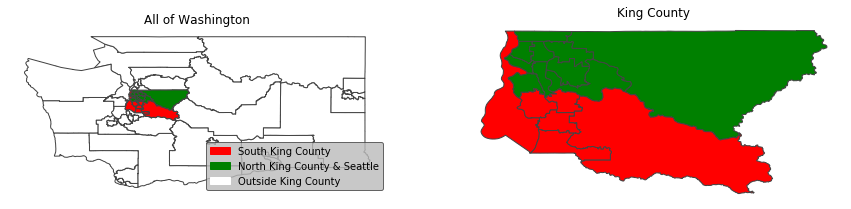

In [59]:

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0] = wa_df.plot(ax=ax[0], color = wa_df['color'], edgecolor = '#444444')
ax[0].set_axis_off()

ax[1] = new_df.plot(ax=ax[1], color = new_df['color'], edgecolor = '#444444')
ax[1].set_axis_off()

red_patch = mpatches.Patch(color='red', label='South King County')
green_patch = mpatches.Patch(color='green', label='North King County & Seattle')
blue_patch = mpatches.Patch(color='white', label='Outside King County')

ax[0].title.set_text("All of Washington")
ax[1].title.set_text("King County")

ax[0].legend(handles=[red_patch, green_patch, blue_patch], loc = 4, prop = {'size': 10}, edgecolor = '#444444', facecolor = '#bbbbbb')

## Total number of OY per PUMA

In [32]:
puma_oy_totals = pd.read_sql(sql="SELECT * FROM OY_by_puma0;", con=engine)
puma_oy_totals_df = pd.DataFrame(puma_oy_totals).style.hide_index()
puma_oy_totals_df

puma,sum
11610,1853
11611,2038
11612,1977
11613,2006
11614,1530
11615,1210


## Total number of OY in South King County

In [33]:
print('In South King county there are ' + str(puma_oy_totals['sum'].sum()) + ' persons we can identify as OY.')

In South King county there are 10614.0 persons we can identify as OY.


## Creating Table 1

In [35]:
df_oy = pd.read_sql(sql="SELECT * FROM table_final_query_1", con=engine)
df_oy

,pop,age_group,est,total,pct
0,oy_yes,16-18,"1,815.0","30,141.0",6.0
1,oy_no,16-18,"27,877.0","30,141.0",92.5
2,working w/o a diploma,16-18,449.0,"30,141.0",1.5
3,oy_yes,19-21,"3,902.0","25,486.0",15.3
4,oy_no,19-21,"20,184.0","25,486.0",79.2
5,working w/o a diploma,19-21,"1,400.0","25,486.0",5.5
6,oy_no,22-24,"23,781.0","30,256.0",78.6
7,working w/o a diploma,22-24,"1,578.0","30,256.0",5.2
8,oy_yes,22-24,"4,897.0","30,256.0",16.2


In [40]:
df_oy_new = df_oy.pivot(index='pop', columns='age_group', values=['est','total','pct'])
df_oy_new

est                      total                    \
age_group                16-18    19-21    22-24    16-18    19-21    22-24   
pop                                                                           
oy_no                 27,877.0 20,184.0 23,781.0 30,141.0 25,486.0 30,256.0   
oy_yes                1,815.0  3,902.0  4,897.0  30,141.0 25,486.0 30,256.0   
working w/o a diploma 449.0    1,400.0  1,578.0  30,141.0 25,486.0 30,256.0   

                        pct              
age_group             16-18 19-21 22-24  
pop                                      
oy_no                 92.5  79.2  78.6   
oy_yes                6.0   15.3  16.2   
working w/o a diploma 1.5   5.5   5.2

In [39]:
df_oy_new.rename(index={'oy_no':'Not an Opportunity Youth', 'oy_yes':'Opportunity Youth','working w/o a diploma':'Working without a diploma'})

est                      total           \
age_group                    16-18    19-21    22-24    16-18    19-21   
pop                                                                      
Not an Opportunity Youth  27,877.0 20,184.0 23,781.0 30,141.0 25,486.0   
Opportunity Youth         1,815.0  3,902.0  4,897.0  30,141.0 25,486.0   
Working without a diploma 449.0    1,400.0  1,578.0  30,141.0 25,486.0   

                                     pct              
age_group                    22-24 16-18 19-21 22-24  
pop                                                   
Not an Opportunity Youth  30,256.0 92.5  79.2  78.6   
Opportunity Youth         30,256.0 6.0   15.3  16.2   
Working without a diploma 30,256.0 1.5   5.5   5.2

## Creating Table 2

In [44]:
no_degree = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl <= '15')
    AND sch = '1'
;"""

some_college = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl = '18' OR schl = '19')
    AND sch = '1'
;
"""

hs_diploma = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl = '16' OR schl = '17')
    AND sch = '1'
;"""


college_deg = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl BETWEEN '20' AND '24')
    AND sch = '1'
;
    """

total_oy = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND sch = '1'
;
    """

In [45]:
df_total_oy = pd.read_sql(sql = total_oy, con = engine) #data frame for individuals with highschool degree or GED
df_hs_ged = pd.read_sql(sql = hs_diploma, con = engine) #data frame for individuals with highschool degree or GED
df_no_degree = pd.read_sql(sql = no_degree, con = engine) #data frame for individuals with no degree
df_some_college = pd.read_sql(sql = some_college, con = engine) #data frame for individuals with some college experience
df_col_deg = pd.read_sql(sql = college_deg, con = engine) #data frame for individuals with an AA degree or higher

In [46]:
def get_average(data, col_name, age1 = 16, age2 = 24):
    try: 
        filtered_data = data[(data.agep >= age1) & (data.agep <= age2)]
        filtered_data['weighted_sum'] = filtered_data[col_name]*filtered_data['pwgtp']
        sum_of_weighted_data = filtered_data['weighted_sum'].sum()
        sum_of_weights = filtered_data['pwgtp'].sum()
        return sum_of_weighted_data/sum_of_weights
    except:
        print("operation could not be completed")


def weight_sum(df):
    weighted_sum = df['pwgtp'].sum()
    return weighted_sum
                      

def trisect_ages(df):
    df_16_18 = df[(df.agep>=16) & (df.agep <= 18)]
    value_16_18 = weight_sum(df_16_18)
    
    df_19_21 = df[(df.agep>=19) & (df.agep <= 21)]
    value_19_21 = weight_sum(df_19_21)
    
    df_22_24 = df[(df.agep>=22) & (df.agep <= 24)]
    value_22_24 = weight_sum(df_22_24)
    
    value_total = weight_sum(df)
    
    value_array = np.array([value_16_18, value_19_21, value_22_24, value_total])
    return value_array

def form_another_2d_array(df_list):
    new_list = np.zeros(len(df_list)+1)
    final_table = np.array([trisect_ages(x_df) for x_df in df_list])

    
    return final_table
    

def create_df(array_entry, columns_entry, index_entry):
    df = pd.DataFrame(array_entry, columns = columns_entry, index = index_entry)
    return df

def add_percentages(df):
    for col in df.columns:
        if 'total' in col:
            df["{} percentage".format(col[:5])] = round(df[col]/df.loc['Total Population', col]*100)
            
def add_percentages_total(df):
    for col in df.columns:
        if 'total' in col:
            df["{} percentage".format(col[:5])] = round(df[col]/df.loc['Total Population', '16-24 total']*100)
            
def get_plot_info(df_new, df_original, row):
    labels= ['16-18 percentage', '19-21 percentage', '22-24 percentage', 'total percentage']
    x = [] # values of the first bar graph
    y = [] # values of the second bar graph
    z = np.arange(len(labels)) # label location
    width = .35 # width of the bars
    for col in df_new.columns:
        if ('percentage' in col):
            x.append(df_new.loc[row,col])
    for col in df_original.columns:
        if ('percentage' in col):
            y.append(df_original.loc[row,col])
    return x, y, z, width


In [49]:
tri_sected1 = trisect_ages(df_col_deg)
tri_sected2 = trisect_ages(df_no_degree)
tri_sected5 = trisect_ages(df_total_oy)
second_array = form_another_2d_array([df_total_oy, df_no_degree, df_hs_ged, df_some_college, df_col_deg])

In [50]:
index_names = ['Total Population', 'No HS Degree or GED', 'High School Degree/GED','Some College', 'AA or higher']
column_names = ['16-18 total', '19-21 total', '22-24 total', '16-24 total']
second_df = create_df(second_array, column_names, index_names)


reorganized_list = ['16-18 percentage','16-18 total', '19-21 percentage', '19-21 total', '22-24 percentage', '22-24 total', '16-24 percentage', '16-24 total', ]
second_df = second_df.reindex(columns = reorganized_list)
add_percentages_total(second_df)
second_df

,16-18 percentage,16-18 total,19-21 percentage,19-21 total,22-24 percentage,22-24 total,16-24 percentage,16-24 total
Total Population,17.0,"1,815.0",37.0,"3,902.0",46.0,"4,897.0",100.0,"10,614.0"
No HS Degree or GED,9.0,916.0,10.0,"1,112.0",13.0,"1,349.0",32.0,"3,377.0"
High School Degree/GED,7.0,781.0,21.0,"2,176.0",20.0,"2,135.0",48.0,"5,092.0"
Some College,1.0,118.0,5.0,521.0,9.0,"1,000.0",15.0,"1,639.0"
AA or higher,0.0,0.0,1.0,93.0,4.0,413.0,5.0,506.0


## Creating vizualizations

In [64]:
df_oy_pct = df_oy_new['pct']

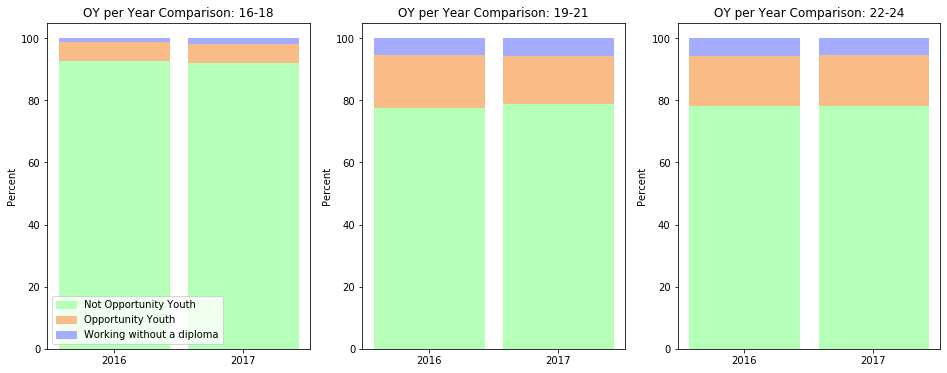

In [52]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data_1 = {'greenBars': [93, df_oy_pct.loc['oy_no', '16-18']], 
            'orangeBars': [6, df_oy_pct.loc['oy_yes', '16-18']],
            'blueBars': [1, df_oy_pct.loc['working w/o a diploma','16-18']]
           }

raw_data_2 = {'greenBars': [78, df_oy_pct.loc['oy_no', '19-21']], 
            'orangeBars': [17, df_oy_pct.loc['oy_yes', '19-21']],
            'blueBars': [5, df_oy_pct.loc['working w/o a diploma','19-21']]
           }

raw_data_3 = {'greenBars': [78.5, df_oy_pct.loc['oy_no', '22-24']], 
            'orangeBars': [16, df_oy_pct.loc['oy_yes', '22-24']],
            'blueBars': [5.5, df_oy_pct.loc['working w/o a diploma','22-24']]
           }

raw_data = [raw_data_1, raw_data_2, raw_data_3]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0], ax[1], ax[2] = ax.flatten()
t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];


for data in range(3):
    df = pd.DataFrame(raw_data[data])

    # # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

    # plot
    barWidth = 0.85
    names = ('2016','2017')

    # Create green Bars
    p1 = ax[data].bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
    # Create orange Bars
    p2 = ax[data].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
    # Create blue Bars
    p3 = ax[data].bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)

    # Custom x axis
    ax[data].set_xticks([0,1])
    ax[data].set_xticklabels(['2016','2017'])
    ax[data].set_ylabel('Percent')
    ax[data].set_title(t[data])

# Show graphic

ax[0].legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower left')
plt.show()


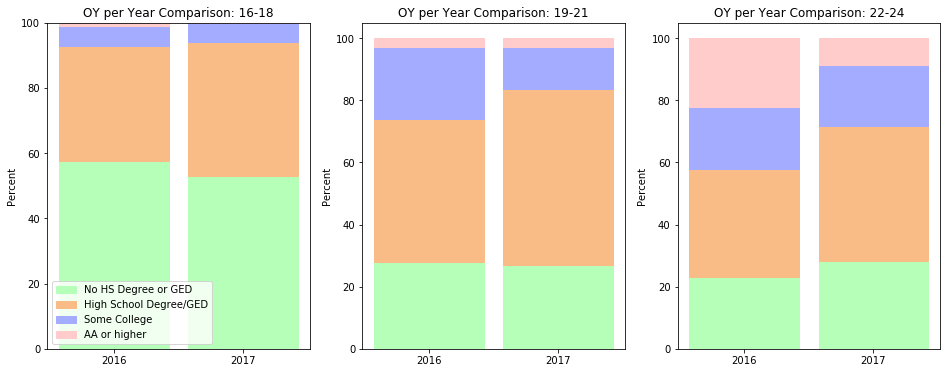

In [51]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data_1 = {'greenBars': [57, second_df.loc['No HS Degree or GED', '16-18 percentage']], 
            'orangeBars': [35, second_df.loc['High School Degree/GED', '16-18 percentage']],
            'blueBars': [6, second_df.loc['Some College','16-18 percentage']],
            'redBars': [1, second_df.loc['AA or higher','16-18 percentage']]
           }

raw_data_2 = {'greenBars': [28, second_df.loc['No HS Degree or GED', '19-21 percentage']], 
            'orangeBars': [46, second_df.loc['High School Degree/GED', '19-21 percentage']],
            'blueBars': [23, second_df.loc['Some College','19-21 percentage']],
            'redBars': [3, second_df.loc['AA or higher','19-21 percentage']]
           }

raw_data_3 = {'greenBars': [23, second_df.loc['No HS Degree or GED', '22-24 percentage']], 
            'orangeBars': [35, second_df.loc['High School Degree/GED', '22-24 percentage']],
            'blueBars': [20, second_df.loc['Some College','22-24 percentage']],
            'redBars': [22, second_df.loc['AA or higher','22-24 percentage']]
           }
                        
raw_data = [raw_data_1, raw_data_2, raw_data_3]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0], ax[1], ax[2] = ax.flatten()

t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];


for data in range(3):
    df = pd.DataFrame(raw_data[data])

#     # # From raw value to percentage
    totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
    redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]

    # plot
    barWidth = 0.85
    names = ('2016','2017')

    # Create green Bars
    p1 = ax[data].bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth )
    # Create orange Bars
    p2 = ax[data].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
    # Create blue Bars
    p3 = ax[data].bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
     # Create red Bars
    p4 = ax[data].bar(r, redBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#ffcccb', edgecolor='#ffcccb', width=barWidth)

  
    # Custom x axis
    ax[data].set_xticks([0,1])
   # ax[data].set_yrange(0,100,10)
    ax[data].set_xticklabels(['2016','2017'])
    ax[data].set_ylabel('Percent')
    ax[data].set_title(t[data])

# Show graphic

ax[0].legend((p1[0], p2[0], p3[0], p4[0]), ('No HS Degree or GED', 'High School Degree/GED', 'Some College', 'AA or higher'), loc='lower left')
plt.show()


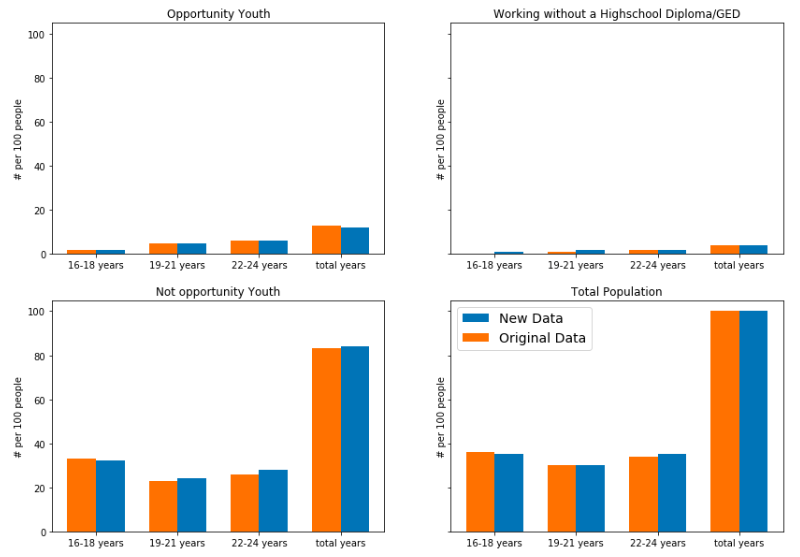


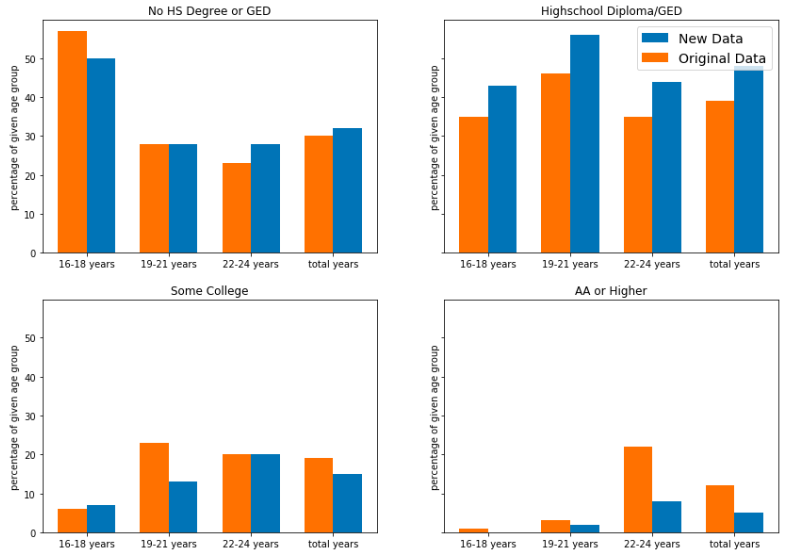
